In [10]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

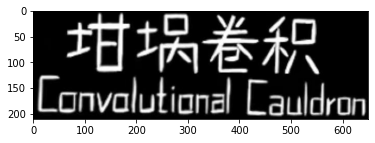

In [244]:
watermark = cv2.imread('./IMG_0669.JPG', cv2.IMREAD_UNCHANGED)[780:990, 220:870, :]
watermark = cv2.bitwise_not(watermark)
plt.imshow(watermark)

In [ ]:
# Everywhere except for the words: make black


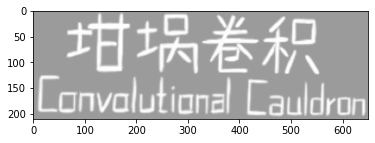

In [248]:
rgba = cv2.cvtColor(watermark, cv2.COLOR_RGB2RGBA)
rgba[:, :, 3] = 100
plt.imshow(rgba)

In [249]:
B, G, R, A = cv2.split(rgba)
B = cv2.bitwise_and(B, B, mask=A)
G = cv2.bitwise_and(G, G, mask=A)
R = cv2.bitwise_and(R, R, mask=A)
rgba = cv2.merge([B, G, R, A])

In [250]:
cv2.imwrite('./test.png', rgba)

True

In [239]:
img = cv2.imread('./DSC00110.JPG')
(h, w) = img.shape[:2]
img = np.dstack([img, np.ones((h, w), dtype='uint8') * 255])
overlay = np.zeros((h, w, 4), dtype='uint8')
(wH, wW) = rgba.shape[:2]
overlay[h - wH - 10:h - 10, w-wW-10:w-10] = rgba

In [240]:
output = img.copy()
result = cv2.addWeighted(overlay, 0.2, output, 1, 0.0)

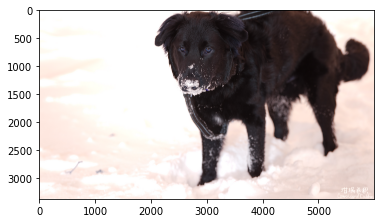

In [241]:
plt.imshow(result)

In [242]:
cv2.imwrite('./result_sprouts.JPG', result)

True